In [2]:
# manipulating dataframes
import pandas as pd
import numpy as np

# visualizing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
pet_df= pd.read_csv('../input/train/train.csv')

In [6]:
pet_df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [49]:
pet_description_df = pet_df[['Type','Description','AdoptionSpeed']]
pet_description_df
y_pet_df= pet_description_df['AdoptionSpeed']

In [50]:
def adoption_rate(y):
    if 0 <= y <=1:
        return "Fast"
    if 2 <= y <=3:
        return "Medium"
    if y ==4:
        return "Slow"

In [51]:
# feature for the adoptation_rate of each pet
pet_description_df["AdoptionRate"] = pet_description_df["AdoptionSpeed"].apply(adoption_rate)
pet_description_df["AdoptionRate"].value_counts()

Medium    7296
Slow      4197
Fast      3500
Name: AdoptionRate, dtype: int64

In [52]:
# Checking the ratio of type 1 and type 2
# Type 1: Dog
# Type 2: Cat
pet_description_df.Type.value_counts()

1    8132
2    6861
Name: Type, dtype: int64

In [53]:
pet_description_df.head()

,Type,Description,AdoptionSpeed,AdoptionRate
0,2,Nibble is a 3+ month old ball of cuteness. He ...,2,Medium
1,2,I just found it alone yesterday near my apartm...,0,Fast
2,1,Their pregnant mother was dumped by her irresp...,3,Medium
3,1,"Good guard dog, very alert, active, obedience ...",2,Medium
4,1,This handsome yet cute boy is up for adoption....,2,Medium


In [54]:
pet_description_df.dtypes

Type              int64
Description      object
AdoptionSpeed     int64
AdoptionRate     object
dtype: object

In [55]:
pet_description_df.Description.astype(str)

0        Nibble is a 3+ month old ball of cuteness. He ...
1        I just found it alone yesterday near my apartm...
2        Their pregnant mother was dumped by her irresp...
3        Good guard dog, very alert, active, obedience ...
4        This handsome yet cute boy is up for adoption....
5        This is a stray kitten that came to my house. ...
6        anyone within the area of ipoh or taiping who ...
7        Siu Pak just give birth on 13/6/10 to 6puppies...
8        healthy and active, feisty kitten found in nei...
9        Very manja and gentle stray cat found, we woul...
10       For serious adopter, please do sms or call for...
11       Kali is a super playful kitten who is on the g...
12       Peanut was an abused puppy until he was rescue...
13       Hi Pet Lovers! This is my first posting and I ...
14       Lost Dog Found (Bandar Menjalara, Kepong／Taman...
15       We moved out of our apartment to a landed home...
16                 to be spayed on /12 adorable & friend

In [56]:
pet_description_df.dtypes


Type              int64
Description      object
AdoptionSpeed     int64
AdoptionRate     object
dtype: object

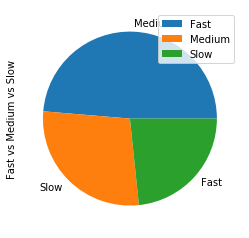

In [57]:
# Plot the class distribution
pet_description_df["AdoptionRate"].value_counts().plot(kind = 'pie')
plt.ylabel("Fast vs Medium vs Slow")
plt.legend(["Fast", "Medium","Slow"])
plt.show()


In [58]:
pet_text = pet_description_df['Description']
pet_text

0        Nibble is a 3+ month old ball of cuteness. He ...
1        I just found it alone yesterday near my apartm...
2        Their pregnant mother was dumped by her irresp...
3        Good guard dog, very alert, active, obedience ...
4        This handsome yet cute boy is up for adoption....
5        This is a stray kitten that came to my house. ...
6        anyone within the area of ipoh or taiping who ...
7        Siu Pak just give birth on 13/6/10 to 6puppies...
8        healthy and active, feisty kitten found in nei...
9        Very manja and gentle stray cat found, we woul...
10       For serious adopter, please do sms or call for...
11       Kali is a super playful kitten who is on the g...
12       Peanut was an abused puppy until he was rescue...
13       Hi Pet Lovers! This is my first posting and I ...
14       Lost Dog Found (Bandar Menjalara, Kepong／Taman...
15       We moved out of our apartment to a landed home...
16                 to be spayed on /12 adorable & friend

In [59]:
a = ""

for p in pet_text:
    print(p)

Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care.
I just found it alone yesterday near my apartment. It was shaking so I had to bring it home to provide temporary care.
Their pregnant mother was dumped by her irresponsible owner at the roadside near some shops in Subang Jaya. Gave birth to them at the roadside. They are all healthy and adorable puppies. Already dewormed, vaccinated and ready to go to a home. No tying or caging for long hours as guard dogs. However, it is acceptable to cage or tie for precautionary purposes. Interested to adopt pls call me.
Good guard dog, very alert, active, obedience waiting for her good master, plz call or sms for more details if you really get i

Found this silky terrier near tesco puchong. Both eyes with cataract and approx 10yrs old as per vet estimation. Quiet and timid. Hope some kind soul can adopt this sweet girl. Pls pm if interested to adopt.
A tiny bundle of cuteness, my pictures do not do Cutie justice; she is an affectionate, friendly and playful kitten that I believe will be a wonderful companion. She is not fearful or shy, and likes being close with people. My father rescued this little one off a busy road a few days ago, but we have two felines of our own... As such, please drop me a message or a call if you would like to give her a forever home :) Cheers!
This little cutie is looking for a forever home. She is healthy, friendly and loving. Please do call me at. Serious adopter only. Tq
This little kitten was found at the back lane of my house. She was in fear, hunger and eagerly looking for her mum. Unfortunately, she was alone. So, I brought it home and have been taking care of it. I have 4 other cats so I would

Found Bubba abandoned by his mum in the car park. The vet has estimated he is only 1-2 weeks old. For this adoption you must be willing to feed bubba every 2 hours and he must be kept in a warm environment. He is super outgoing and friendly, the only reason I cannot keep him is because I am returning to Australia in 2 weeks.
Dolly is among four siblings found in Ara Damansara just before Chinese New Year. She is extremely smart. Steady and bold, and listens to commands. Alert too. She and her sister Chocolate are the last two left. Weighs 13 kgs. She has had all 3 puppy vaccinations. Vaccination and neutering cost to be borne by adopter. Please call if you can give them a good home.
Johnny is an 8 year old Golden retriever who is great with kids an obsessed with balls. He is urgently looking for a home as his current owners are aging and have no space in their new home.
MOST SUITABLE owner will be selected. Because adoption fee is FREE and Marschia really needs special care, I have to 

小白〈Xiao Bai〉has been abandoned by a cruel owner outside the house. She is Very friendly and adorable dog.. I am looking for a permanent,loving home and a responsible dog owner to adopt her. She will be a great companion. New owners must be able to provide for them with lots of love, shelter, food and medical care for the rest of their lives. Do you have the love and care to offer? Requirements for Adoption: ========================= Cost of vaccinations and neutering to be borne by adopter. Vaccinations and neutering/spaying at 6 months of age are COMPULSORY. If you are interested in adopting,kindly contact me by call or sms . Please do not submit an inquiry if you are not serious about adopting.
Puffy is very much healthy and he is a very well manner dog. He doesn't bark a lot except when you leave him alone. He crave for human companionship and he needs lots of LOVE. Well lately I shaved him down because he's got too many knots that won't go away. But besides that, everything's norma

Rescued and spayed. Very cute and obedient Interested to adopt please call
Larry is sweetheart. His a playful cat and will always listen to you he will also eat anything you give him without hesitation (he mostly likes dry food). Larry is a shy cat, so it may take a while for him to get use to you but don't worry, in time he will. If you would like more information about him. Call us at or email
He is very playful, alert, energetic, smart and very healthy. But I tend to be a bit jealousy....
Hi My Name is Shadow, currently find a forvwr love home. I just dumped by people in garbage area,biting by red ants. Fortunately, my rescuer found me and rescued me. Currently I'm under admitted for check up and boarding. I'm waiting to going back home with you. Contact my rescuer in
Woof woof.. I’m Polar and I’m 2 years old. I’m very cute, playful, active, friendly, and I love huuuumans a lot. I like to give them kisses every day. I love to smile too. I am very healthy and can stay awake and alert

this dog was neutered and released back to the street but was caught by MPSJ. Please help the dog to find a home or Not she will be caught again by the authorities.
A greedy and lazy pug, but she's cute and love it when people massage her back! She has a front tooth jutted out and she's clumsy! She also loves chasing and playing with another dog of mine!
Nine puppies!!! That's what this mummy dog produced! Now they need loving, warm homes. Please call. Thank you.
LOOKING FOR A FOREVER HOME FOR HER....
Found a Friendly Female beagle at Taman Equine Shopping Mall, Seri Kembangan, parking. Estimated age 2 year old
Rottie is a mixed breed with one parent a mongrel and the other a pure breed Rottweiler. He is good natured, gentle and well behaved and this makes an excellent family pet. He is also very alert and this makes him a good guard dog. Therefore, Rottie is a two-in-one dog who is in need of a good home.
Sep SPCA Ampang is relocating to a smaller place. The current center will be pul

URGENTLY IN NEED OF CARING FOSTER PARENTS/HOME. The RM fee is just for transporting him ANYWHERE in Malaysia. Paid AFTER delivery. I found her abandoned near a night market area, cleaned her up, took her to the vet and kept her inside the house at all time. Now I'm unable to take care of her due to family commitments but I counldn't bare throwing her back out on the streets. Pro: She's very friendly, likes to play with stings. Poopy-trained Shiny black fur coat except for two "white stars" on her chest and belly :P Cons: she doesn't like being bathed... she'll go into a half-frenzy Please contact after office hours (6pm-10pm)or any time on weekends.
Open 4 book akan diberi bila dah bercerai susu n pandai makan sendiri adoption fee bukan bertujuan untuk nak jual cuma harap owner baru tak mensia-siakan dia gender xpasti lg..akan dimaklumkan kemudian.. harap ada yg sudi nak jga dia sbb da byak sgat kucing kat uma.. DOB : 17/9/09
We rescued 3 puppies at Bagan Ajam Market on Sunday morning.

Tolong selamatkan kucing ini daripada jadi gelandangan/dibuang. Manja dan comel tapi takut guruh. Dia ikut kalau Tolong
Hello People! My name is Thea! Wow, I love this name! I’ve just Googled it and it’s Greek for Goddess! A Goddess of the light, mother of the sun, moon and dawn. Wow! Now I don’t know about the Goddess bit, but my heart is really full of light, just like the sun, moon and dawn! I would love the chance to share this with the right person. Yay! I really love people, cats and other doggies and I’m really chilled out, incredible sweet, gentle and good natured, with a lot of energy for life. I love running, playing fetch with sticks and chewing on rawhide (okay and sometimes the odd shoe that’s been left lying around, well…. I’m still a puppy after all! Hee Hee!) 😝 If you are reading this and feel that you would like to adopt me then please do contact my friend here. I will love my new family forever and ever and I look forwards to sharing many happy moments together, we ca

Litters of a crossed breed mama dog. Super duper adorable. Please call for appointment. Only sincere adopters.
This is a stray cat found and is being looked after by Kak Azah my neighbour. I am helping her to post this and look for a 'Forever Home' for Wakaka. Wakaka is very even tempered, playful and loves playing with other kittens. He is on Blackwood Kitten and is toilet trained. Please contact Kak Azah at if you are interested to adopt Wakaka.
so cute and kind
Lovely puppy looking for a forever home. Commitment to spay is compulsory. If interested to adopt pls contact Amy
LOST/ABANDONED & FOUND at SS2/4 for adoption, kindly call and do not message us - Previously : Deep wound on the neck. Received treatment and still boarded in St Angel. Named: Ducky Age: 2-3yrs Gender: Male Breed: Welsh Corgi mixed Vaccinated and neutered. Terms, Conditions & Guideline Exceptions : 1) I agree that the animal is being adopted for myself and will not be sold, adopted or given to any other part 2) Th

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Little Bentley is a vibrant pup who likes people. This little boy is active and will make a good guard dog in the future. If you wish adopt please call. Rescued puppies always come from a sad background. Their mothers are always ahandoned and suffer a sad faith. Please give Bentley a place in your home and hearts
this dog belongs to my neighbor. My neighbor dumped her after moving house. She is very attractive, easy approach dog. However, this dog is very choosy, she chooses food to eat, so far, she only eat chicken bones and dog's food. Hence, for the adopter to be, you need to ensure you able to provide such food before adopting her
Fluffy's owner is no longer able to care for her so they have left her with me. For the time I have been with her, I find her to be a quiet cat. She also has a habit of leaning and sitting against the wall which makes her look quite funny. Her coat is white with shades of light golden orange. She is litter trained.
I save them from the drain side.I think 

Type of Pet: 1 mother cat and 3 kittens Age: Mum cat I'm not sure how old, kitten about 1 month to 2 months Location:Subang Jaya / Klang Contact number: Reason for adoption/ Message for interested parties: Please adopt these poor soul.. picture will be post soon
A lovely labrador is looking for new home! I have picked him up from the street due to the minor injured. I have sent him to the vet and he is perfectly fine now. I hope i can take care of him, however I have a Jack Russell at home which can't get along with this cutie hence I would really appreciate it if someone can give him a new home.
Puppies were gave birth by stray dog in bushes, the mother dog is still around but seldom feed the puppies now. the neighbors are taking care of the puppies temporally until someone adopt the poor little puppies. Please contact me if you are willing to adopt the puppies.
Blue approached me in my backstreet asking for food. I noticed he had difficulty eating. The vet found that he had badly inf

### TOKENIZATION - Representing Text

In [39]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# tokens = word_tokenize(pet_text)
# print(tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Christopher\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
# Load Stemming Library (PorterStemmer)
from nltk.stem.porter import PorterStemmer

# Load TFIDFVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
import re

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\<)|(\>)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)|(\_)")

def preprocess_reviews(reviews):
#    i=0
    for line in reviews:
#        i += 1
#        print(i, line)
        if type(line) is str:
            line = REPLACE_NO_SPACE.sub("", line.lower())
        else:
            line = " "
#    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]

    for line in reviews:
        if type(line) is str:
            line = REPLACE_WITH_SPACE.sub(" ", line)
        else:
            line = " "
#    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

pet_description_df['Description'] = preprocess_reviews(pet_description_df['Description'])


1. Stemming Words

In [75]:
# Apply Stemming
porter = PorterStemmer()

descriptions_clean_stemmed = []
for description in pet_description_df['Description']:
    if type(description)==str:
        stems = [porter.stem(word)+' ' for word in description.split()]
        descriptions_clean_stemmed.append("".join(stems))
    else:
        descriptions_clean_stemmed.append("")
        
pet_description_df['Description']=descriptions_clean_stemmed

#pet_description_df['Description'] = pet_description_df['Description'].apply(porter.stem)

NameError: name 'description_clean_stemmed' is not defined

2. StopWord Removal and lower casing

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TFIDFVectorizer with stop word removal and lowercasing of text
pet_cv = TfidfVectorizer(stop_words='english', lowercase=True)

3. Applying TFIDF

In [93]:
pet_train_CV = pet_cv.fit_transform(pet_description_df['Description'])

In [94]:
pet_train_CV.shape

(14993, 20071)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

In [100]:
rf = RandomForestClassifier(n_estimators=10, class_weight='balanced')
rf_model = rf.fit(pet_train_CV,y_pet_df)

In [101]:
# Apply 10-Fold Cross Validation and Examine Accuracy Score
rf_result = cross_val_score(rf_model, pet_train_CV,y_pet_df, cv=10, scoring='accuracy')
rf_result.mean()

0.3530973773091354